In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data set and setting the date columns as index

In [2]:
quarter_kwh = pd.read_csv('./quarter_hour-profile-dm28.csv', encoding='utf-8' )
quarter_kwh['Date'] = pd.to_datetime(quarter_kwh['Date'], dayfirst=True)
# quarter_kwh['Electric_power_kW'] = pd.to_numeric(quarter_kwh['Electric_power_kW'], downcast="float")
# quarter_kwh['Electric_power_kWh'] = quarter_kwh['Electric_power_kW'] * 15/60
quarter_kwh.set_index('Date', inplace=True)
quarter_kwh.head()

,Electric_power_kW
Date,
2008-01-01 00:00:00,57.6
2008-01-01 00:15:00,57.6
2008-01-01 00:30:00,57.6
2008-01-01 00:45:00,57.6
2008-01-01 01:00:00,57.6


In [3]:
print(f' The dataset contains data for {(quarter_kwh.index[-1].date()-quarter_kwh.index[0].date()).days + 1} days')
ndays = int(quarter_kwh['Electric_power_kW'].count()*15/60*1/24)
print(f' The dataset effectively has data for {ndays} days')
ndays_notnull = int(quarter_kwh['Electric_power_kW'].notnull().count()*15/60*1/24)
print(f' The dataset has not null data for {ndays_notnull} days')

 The dataset contains data for 1430 days
 The dataset effectively has data for 1430 days
 The dataset has not null data for 1430 days


In [4]:
quarter_kwh.shape

(137280, 1)

In [5]:
quarter_kwh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137280 entries, 2008-01-01 00:00:00 to 2011-11-30 23:45:00
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Electric_power_kW  137280 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


Text(0, 0.5, 'Power demand [kW]')

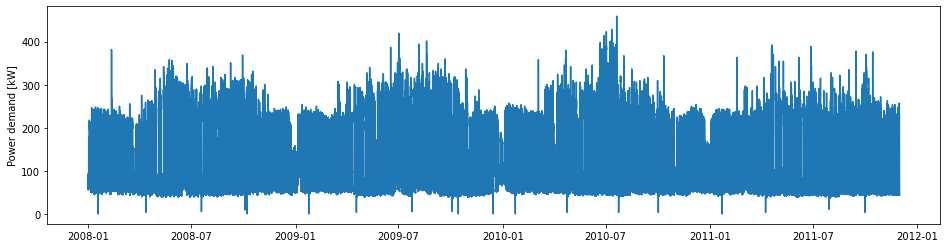

In [6]:
plt.figure(figsize=(16,4))
plt.plot(quarter_kwh['Electric_power_kW'])
plt.ylabel('Power demand [kW]')

## Changing time scale: From 15 min time step to 1 h

In [7]:
hour_kwh = quarter_kwh.resample('h').mean()
# hour_kwh = quarter_kwh.groupby(quarter_kwh.index.to_period('H'), axis=0).mean()
hour_kwh.shape

(34320, 1)

In [8]:
hour_kwh['Electric_power_kW'].count()*1/24

1429.8333333333333

In [9]:
print(f' After conversion dataset contains data for {(hour_kwh.index[-1].date()-hour_kwh.index[0].date()).days + 1} days')
ndays = hour_kwh['Electric_power_kW'].count()*1/24
print(f' The dataset effectively has data for {ndays} days')
ndays_notnull = hour_kwh['Electric_power_kW'].notnull().count()*1/24
print(f' The dataset has not null data for {ndays_notnull} days')

 After conversion dataset contains data for 1430 days
 The dataset effectively has data for 1429.8333333333333 days
 The dataset has not null data for 1430.0 days


In [10]:
hour_kwh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34320 entries, 2008-01-01 00:00:00 to 2011-11-30 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Electric_power_kW  34316 non-null  float64
dtypes: float64(1)
memory usage: 536.2 KB


## Adding date attributes

In [11]:
hour_kwh['dow'] = hour_kwh.index.dayofweek +1 # day of week Monday:1 -> Sunday: 7
hour_kwh['doy'] = hour_kwh.index.dayofyear # day of year 1 - 366 (leap year)
hour_kwh['year'] = hour_kwh.index.year # year
hour_kwh['month'] = hour_kwh.index.month # month of the year 1 - 12
hour_kwh['quarter'] = hour_kwh.index.quarter # quarter of the year 1 - 4
hour_kwh['hour'] = hour_kwh.index.hour # hour of day 0 - 23
hour_kwh['weekday'] = hour_kwh.index.day_name() # name of the day Monday - Sunday
hour_kwh['woy'] = hour_kwh.index.weekofyear # Week of year 1 - 53
hour_kwh['dom'] = hour_kwh.index.day # Day of month 1 - 31
hour_kwh['date'] = hour_kwh.index.date # Date
hour_kwh['how'] = (hour_kwh['dow'] - 1)* 24 + (hour_kwh['hour'] + 1) # hour of week 1 - 144
hour_kwh['mnw'] = np.arange(1, hour_kwh.shape[0]+1)//24//7 + 1 # number of measure weeks

### Plotting all the data set (hour by hour for 4 years)

Text(0, 0.5, 'Power demand [kW]')

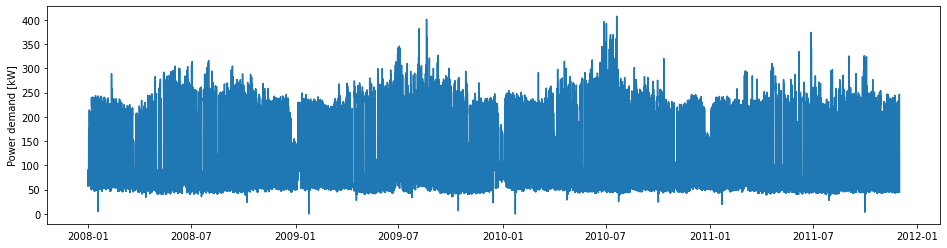

In [12]:
plt.figure(figsize=(16,4))
plt.plot(hour_kwh['Electric_power_kW'])
plt.ylabel('Power demand [kW]')

<AxesSubplot:xlabel='Electric_power_kW', ylabel='Count'>

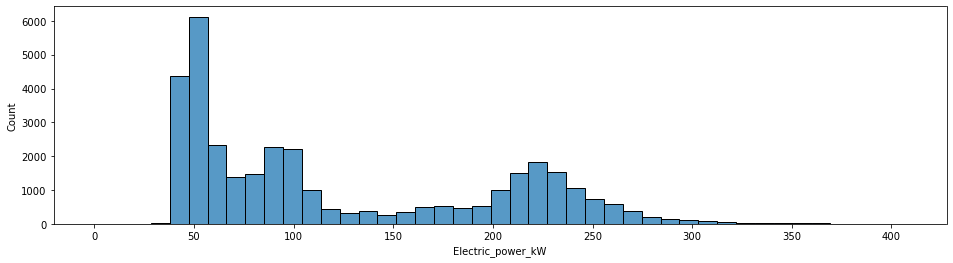

In [13]:
plt.figure(figsize=(16,4))
sns.histplot(x='Electric_power_kW',data=hour_kwh)

### Arranging data hour by hour in a weekly base

In [14]:
hour_kwh_matrix_week = hour_kwh.pivot_table(index='mnw',columns='how',values='Electric_power_kW',aggfunc='sum').fillna(0)

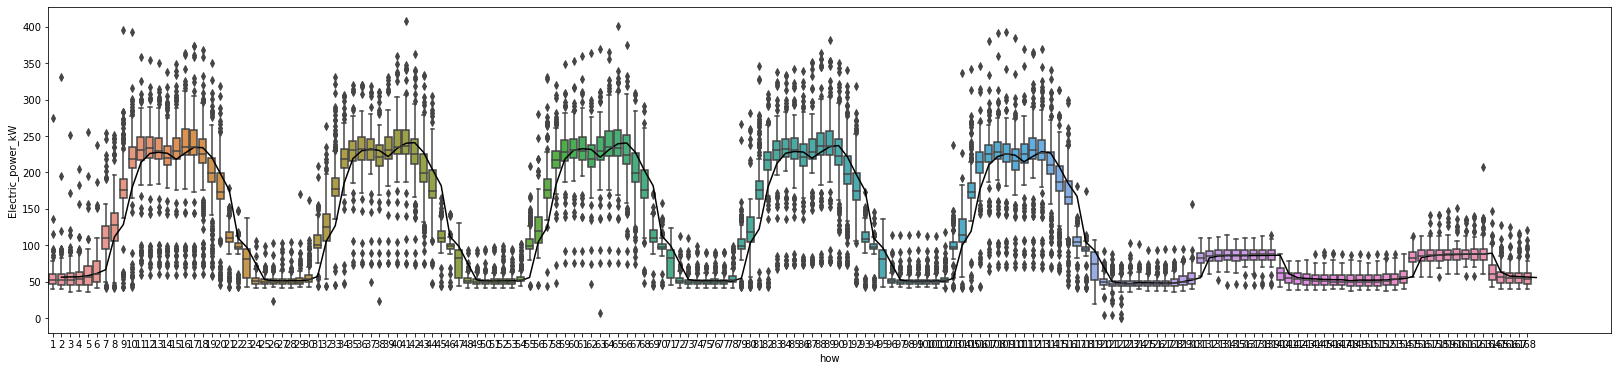

In [15]:
plt.figure(figsize=(28,6))
sns.boxplot(x='how', y='Electric_power_kW',data=hour_kwh)
plt.plot(hour_kwh_matrix_week.columns, hour_kwh_matrix_week.describe().loc['mean'], 'k-')

## Dividing data into 2 subsets: Weekdays & Weekend days

### Weekdays

In [16]:
hour_kwh_matrix_weekday = hour_kwh[hour_kwh['dow']<6].pivot_table(index='date',columns='hour',values='Electric_power_kW',aggfunc='sum').fillna(0)

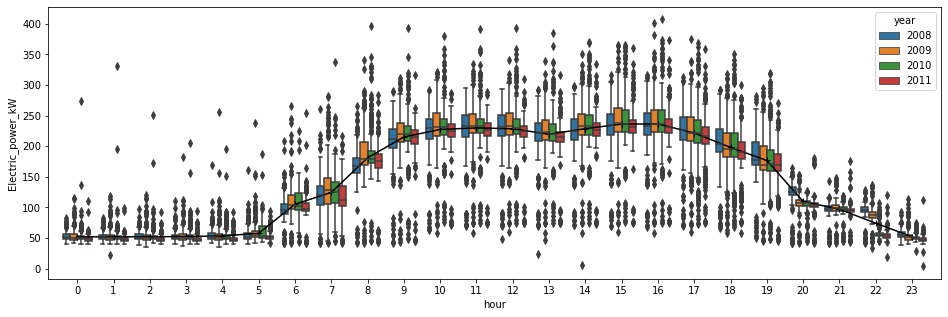

In [17]:
plt.figure(figsize=(16,5))
sns.boxplot(x='hour', y='Electric_power_kW',data=hour_kwh[hour_kwh['dow']<6], hue='year')
plt.plot(hour_kwh_matrix_weekday.columns, hour_kwh_matrix_weekday.describe().loc['mean'], 'k+-')

<AxesSubplot:xlabel='Electric_power_kW', ylabel='Count'>

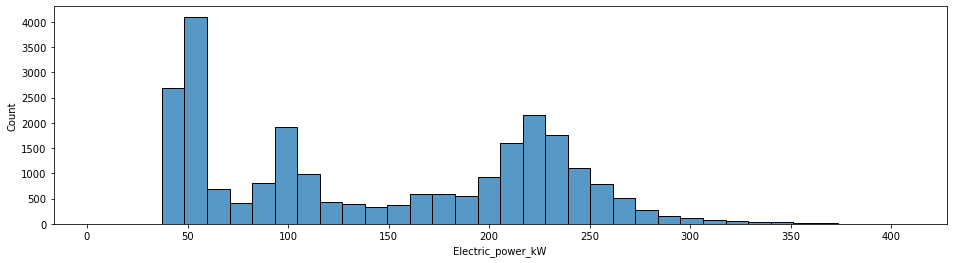

In [18]:
plt.figure(figsize=(16,4))
sns.histplot(x='Electric_power_kW',data=hour_kwh[hour_kwh['dow']<6])

### Weekend days

In [19]:
hour_kwh_matrix_weekend = hour_kwh[hour_kwh['dow']>=6].pivot_table(index='date',columns='hour',values='Electric_power_kW',aggfunc='sum').fillna(0)

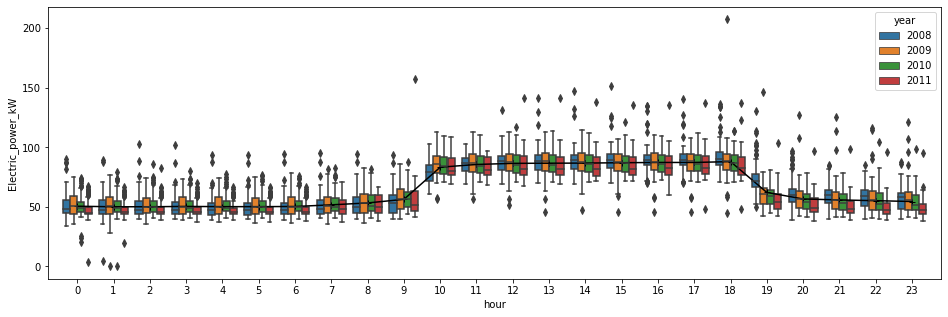

In [20]:
plt.figure(figsize=(16,5))
sns.boxplot(x='hour', y='Electric_power_kW',data=hour_kwh[hour_kwh['dow']>=6], hue='year')
plt.plot(hour_kwh_matrix_weekend.columns, hour_kwh_matrix_weekend.describe().loc['mean'], 'k+-')

<AxesSubplot:xlabel='Electric_power_kW', ylabel='Count'>

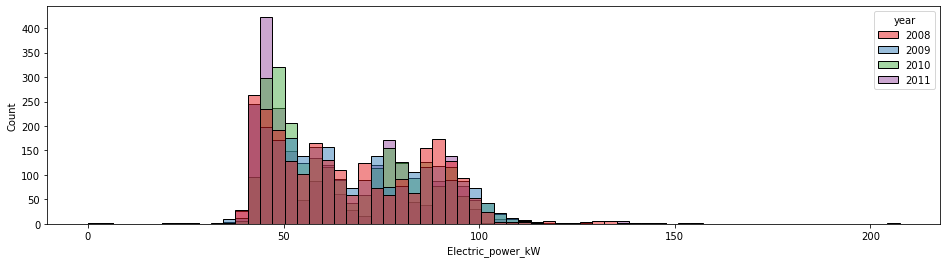

In [21]:
plt.figure(figsize=(16,4))
sns.histplot(x='Electric_power_kW',data=hour_kwh[hour_kwh['dow']>=6], hue='year', palette='Set1')

## Treating outliers

In [22]:
# Possible outliers:
# Holidays
# Equipment working out off schedule
# Make the analysis hour by hour in a daily base